In [ ]:
######################################################################################################################
# Output of this script - 
#
#
######################################################################################################################




# BASE
import pandas as pd
import numpy as np
import sklearn
from sklearn import set_config
import pickle

#VISUALIZATION
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree


#??????????????????????? WHAT ARE YOU????????????????????????
from scipy.stats import mode                                                        #?????????????????????????????????
from sklearn.datasets import load_digits                                            #?????????????????????????????
from sklearn.decomposition import PCA                                               #??????????????????????????
from sklearn.manifold import TSNE                                                   #????????????????????????????
from sklearn.datasets import make_classification                                    #??????????????????????????
from scipy.special import expit                                                     #???????????????????????????


#VOTING
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier


#CLASIFIERS
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                # search of the best params for random_forrest
from sklearn.linear_model import SGDClassifier                                      #????????????????????????
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      #????????????????????????
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                         #???????????
from sklearn.ensemble import AdaBoostClassifier                                     #?????????????




#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





#CLASTERING
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch                                               #????????????????????????????




# SCALERS and TRANSFORMATION
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer




# metrics and processing 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score                                 #??????????????????????????



# EDA data treatment
import missingno


# other (mainly system libs)
import warnings
import sys
from io import StringIO
import time
import os
import shutil
from dotenv import load_dotenv
from sqlalchemy import create_engine
import itertools
from collections import Counter
import urllib.request as req
import zipfile
import csv
import re
from nltk.tokenize import word_tokenize
import string
import joblib

In [23]:
#####################################################
# Constants

SEED = 50
FILE = './data/glove.840B.300d.txt'
#FILE = './data/glove.6B.50d.txt'


STOP_WORDS_FULL = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

STOP_WORDS_SHORT = ['a', 'an', 'the', 'as', 'while', 'of', 'by', 'for', 'to', 
'then', 'so', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

ZERO_VECTOR = [0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0
            ]
################################################################

# Loading splits for processing
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')
y_test = pd.read_csv('./data/y_test.csv')

In [ ]:
#class MyDataTransformer(TransformerMixin):
#    def __init__(self):
#        pass
#    def fit(self, X, y=None):
#        self.biggest_value = X.c1.max()
#        return self
#    def transform(self, X):
#        return X.loc[X.c1 <= self.biggest_value]
#X=load_some_pandas_dataframe()
#pipeline.fit(X)
#joblib.dump(pipeline, 'pipeline.pkl')



def load_glove_library(file): #Borrowed with little modifications from https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
    print('Loading GloVe library '+ file)
    glove_model = {}
    with open(file,'r', encoding='utf-8') as f:
        for line in f:
            word = line.split(' ')[0]
            glove_model[str(word)] = np.array(line.split()[1:], dtype=np.float64)
    print(f"{len(glove_model)} words loaded!")
    return glove_model

def load_glove_large(file):
    df = pd.read_csv(file, sep=" ", quoting=3, header=None, index_col=0)
    glove_model = {key: val.values for key, val in df.T.items()}
    return glove_model

def log_transform(df:pd.DataFrame , colname)-> pd.DataFrame:
    return pd.DataFrame(np.log1p(df[colname]), columns=[colname])




def text_prep(text):
    text=text.lower()
    for val in list(string.whitespace)[1:]:
        while val in text:
            text = text.replace(val, ' ')
    for char in ",.-=+_!?:;@#/|\$%^&*()[]{}":
        while (char in text):
            text = text.replace(char, ' ')
    while '"' in text:
        text = text.replace('"', ' ')
    while "'" in text:
        text = text.replace("'", ' ')
    while " "*6 in text:
        text = text.replace(" "*6, ' ')
    while " "*5 in text:
        text = text.replace(" "*5, ' ')
    while " "*4 in text:
        text = text.replace(" "*4, ' ')
    while " "*3 in text:
        text = text.replace(" "*3, ' ')
    while " "*2 in text:
        text = text.replace(" "*2, ' ')
    text = text.strip()
    return text

def whole_name_vectorizer(text, model):
    sent_vec = ZERO_VECTOR
    numw = 0
    for wrd in text.split():
        try:
            if numw == 0:
                try :sent_vec = model[wrd]
                except: sent_vec = ZERO_VECTOR
            else:
                try: sent_vec = np.add(sent_vec, model[wrd])
                except: sent_vec = np.add(sent_vec, ZERO_VECTOR)
            numw+=1
        except:
            pass
    
    return np.asarray(sent_vec) / numw




#For column transformer:
def names_vectorizer(df:pd.DataFrame, colname, model)-> pd.DataFrame:
    df['vec'+colname] = df[colname].astype('string').str.lower()
    df['vec'+colname] = df['vec'+colname].apply(lambda x: text_prep(x))
    for itr in range(df['vec'+colname].shape[0]):
        df['vec'+colname].iloc[itr] = whole_name_vectorizer(df['vec'+colname].iloc[itr], model)
    return pd.DataFrame(df['vec'+colname], columns=['vec'+colname])

#For pipline:
#def names_vectorizer_pipeline(sentence):
#    sent_vec = ZERO_VECTOR
#    numw = 0
#    for wrd in sentence.split():
#        try:
#            if numw == 0:
#                try :sent_vec = GLOVE_LIB[wrd]
#                except: sent_vec = ZERO_VECTOR
#            else:
#                try: sent_vec = np.add(sent_vec, GLOVE_LIB[wrd])
#                except: sent_vec = np.add(sent_vec, ZERO_VECTOR)
#            numw+=1
#        except:
#            pass
#    return np.asarray(sent_vec) / numw




def calc_dol_p_back(df:pd.DataFrame)-> pd.DataFrame:
    df['backers_adj'] = df['backers'] + (0.01)
    df['dol_p_back'] = df['pledged']/df['backers_adj']
    return pd.DataFrame(df['dol_p_back'])



# Formating dates
def pre_processing_dates(df:pd.DataFrame , colname)-> pd.DataFrame:
    df[colname] = pd.to_datetime(df[colname])
    df[colname+'_day_frac'] = df[colname].dt.day/31
    df[colname+'_month_frac'] = df[colname].dt.month/12
    df[colname+'_year_frac'] = df[colname].dt.year/2024
    df[colname+'_dow'] = df[colname].dt.day_name()
    return pd.DataFrame(df[[colname+'_day_frac',colname+'_month_frac',colname+'_year_frac']].join(pd.get_dummies(df[colname+'_dow'], prefix='launched', prefix_sep='_', drop_first = False, dtype=float))   )

def duration_years(df:pd.DataFrame)-> pd.DataFrame:
    df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
    df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
    df['duration_years'] = df['deadline'] - df['launched']
    df['duration_years'] = df['duration_years'].dt.days.astype('int')
    return pd.DataFrame(df['duration_years']/365)

def duration_days(df:pd.DataFrame)-> pd.DataFrame:
    df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
    df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
    df['duration_years'] = df['deadline'] - df['launched']
    df['duration_years'] = df['duration_years'].dt.days.astype('int')
    return pd.DataFrame(df['duration_years'])

def goal_lin_norm(df:pd.DataFrame , colname)-> pd.DataFrame:
    return pd.DataFrame(df[colname]/df[colname].max())

# Just in case...
def keep_initial(df:pd.DataFrame , columns)-> pd.DataFrame:
    return pd.DataFrame(df[columns])

def kmeans(df:pd.DataFrame , columns)-> pd.DataFrame:
    pass
    return


COLUMNS_TO_KEEP = []
GLOVE_LIB = load_glove_large(FILE)

preprocessor = ColumnTransformer(transformers=[
                    ('ct', OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False), ['category']),
                    ('sct', OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False), ['subcategory']),
                    ('ctry', OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False), ['country']),
                    ('l', FunctionTransformer(pre_processing_dates, kw_args={'colname':'launched'}, validate=False), ['launched']),
                    ('d', FunctionTransformer(pre_processing_dates, kw_args={'colname':'deadline'}, validate=False), ['deadline']),
                    ('dpb', FunctionTransformer(calc_dol_p_back, validate=False), ['backers', 'pledged']),
                    ('cdy', FunctionTransformer(duration_years, validate=False), ['launched', 'deadline']),
                    ('fmaxg', FunctionTransformer(goal_lin_norm, kw_args={'colname':'goal'}, validate=False), ['goal']),
                    ('fmaxp', FunctionTransformer(goal_lin_norm, kw_args={'colname':'pledged'}, validate=False), ['pledged']),
                    ('fmaxb', FunctionTransformer(goal_lin_norm, kw_args={'colname':'backers'}, validate=False), ['backers']),
                    ('av_vec', FunctionTransformer(names_vectorizer, kw_args={'colname':'name', 'model':GLOVE_LIB}, validate=False), ['name']),
                    ('original', FunctionTransformer(keep_initial, kw_args={'columns':COLUMNS_TO_KEEP}, validate=False), COLUMNS_TO_KEEP)
                    ],remainder='drop').set_output(transform="pandas")

#data_pipeline = Pipeline(steps =  [
#                            ('trsfr', preprocessor)
#                            ('scale', StandardScaler()),
#                            ('pca', PCA(0.99, random_state=0)),
#                            ('bins', KMeans(n_clusters=14, init='k-means++', max_iter=1000, n_init='auto', random_state=SEED))
#])


X_train_transf = preprocessor.fit_transform(X_train)
X_test_transf = preprocessor.transform(X_test)

#X_train_transf = data_pipeline.fit_transform(X_train)
#X_test_transf = data_pipeline.transform(X_test)

#joblib.dump(data_pipeline, './models/pipeline_joblib.pkl')
#pipeline = joblib.load('./models/pipeline_pkl.pkl')
#X_test_load = pipeline.transform(X_test)



d:\DSMLAI\ML_GroupProject\.venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [ ]:
clasters = KMeans(n_clusters=14, init='k-means++', max_iter=1000, n_init='auto', random_state=SEED)

X_train_transf['name_cluster'] = pd.Series(clasters.fit_predict(X_train_transf['av_vec__vecname'].values.tolist() ),  name='name_cluster')
X_test_transf['name_cluster'] = pd.Series(clasters.predict(X_test_transf['av_vec__vecname'].values.tolist()),  name='name_cluster')

X_train_transf = X_train_transf.drop('vec_name', axis=1)
X_test_transf = X_test_transf.drop('vec_name', axis=1)

In [27]:
#################################################################################################
#                                           MODEL           3
model_3 = RandomForestClassifier(n_estimators=200, random_state=SEED, n_jobs=-1, verbose = 1)
model_3.fit(X_train_transf, y_train.values.ravel())
##################################################################################################

filename = 'models/Dima_random_forrest_all_w_namevec_bins_large.sav'
pickle.dump(model_3, open(filename, 'wb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   57.4s finished


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.88      0.99      0.93     39523
           1       0.98      0.79      0.88     26770

    accuracy                           0.91     66293
   macro avg       0.93      0.89      0.90     66293
weighted avg       0.92      0.91      0.91     66293



<Axes: >

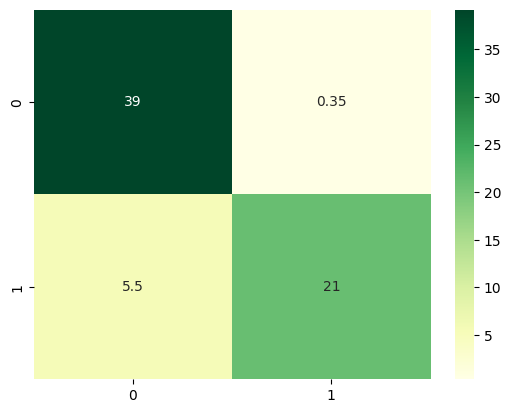

In [ ]:
pred_3 = model_3.predict(X_test_transf)
#pred_3 = (model_3.predict_proba(X_test_transf)[:,1] >= 0.4).astype(bool)

conf_mat_3 = confusion_matrix(y_test, pred_3)/1000
print(classification_report(y_test, pred_3))

sns.heatmap(conf_mat_3, annot=True,  cmap='YlGn')

In [ ]:
droped = pd.read_csv('./data/droped_states.csv')
droped['state']
X_drop = droped[(droped['state'] == 'Canceled') | (droped['state'] == 'Live')].drop('state', axis=1)
y_drop = droped[(droped['state'] == 'Canceled') | (droped['state'] == 'Live')]['state'].map({'Canceled':0, 'Live':1})

X_drop_pre = preprocessor.transform(X_drop)
X_drop_pre['original__name'].iloc[489]


'Documentary of a DSLR Movie  (Canceled)'

In [30]:


X_drop_pre['vec_name'] = names_vectorizer(df=X_drop_pre, colname='original__name', model=GLOVE_LIB)
X_drop_pre = X_drop_pre.drop('original__name', axis=1)
X_drop_pre['name_cluster'] = pd.Series(clasters.predict(X_drop_pre['vec_name'].values.tolist()),  name='name_cluster')
X_drop_pre = X_drop_pre.drop('vec_name', axis=1)






pred_droped_3 = model_3.predict(X_drop_trans)
#pred_droped_3 = (model_3.predict_proba(X_drop_trans)[:,1] >= 0.4).astype(bool)

conf_mat_drop = confusion_matrix(y_drop, pred_droped_3)/1000

print(classification_report(y_drop, pred_droped_3))

sns.heatmap(conf_mat_drop, annot=True,  cmap='YlGn')

TEST_DATA_LINE = pd.DataFrame({'name': ['LETS TRY SOMETHING UNUSUAL'],
                'category': ['Music'],
                'subcategory': ['MADNESS'],
                'country': ['Germany'],
                'launched': ['2012-06-16 23:05:26'],
                'deadline': ['2032-06-16'],
                'goal': [100000],
                'pledged': [2000],
                'backers':[15]})

KeyError: 489